In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import yfinance as yf

In [73]:
df=yf.download('BTC-USD',
                start='2018-01-01',
                end='2024-02-02',
                interval='1d')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...
2024-01-28,42126.125000,42797.175781,41696.910156,42035.593750,42035.593750,16858971687
2024-01-29,42030.914062,43305.867188,41818.332031,43288.246094,43288.246094,20668476578
2024-01-30,43300.226562,43838.945312,42711.371094,42952.609375,42952.609375,23842814518


<Axes: xlabel='Date'>

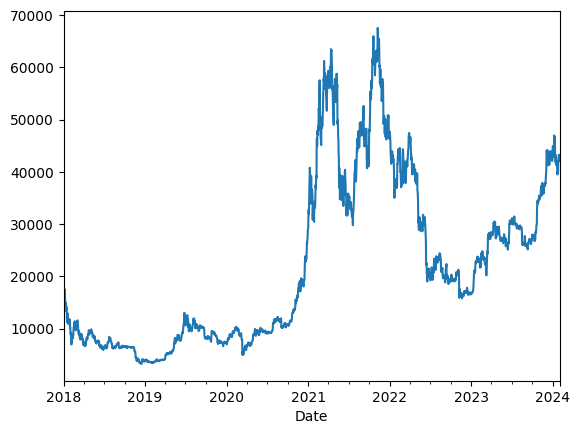

In [74]:
df['Close'].plot()

In [75]:
btc_close=df[['Close']]
btc_close=btc_close.reset_index()
btc_close

,Date,Close
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000
...,...,...
2218,2024-01-28,42035.593750
2219,2024-01-29,43288.246094
2220,2024-01-30,42952.609375
2221,2024-01-31,42582.605469


In [76]:
btc_close.columns=['ds','y']
btc_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2223 non-null   datetime64[ns]
 1   y       2223 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.9 KB


In [77]:
#train_data/test_data
from sklearn.model_selection import train_test_split
btc_train,btc_test=train_test_split(btc_close,test_size=0.2, shuffle=False,random_state=42)
btc_train

,ds,y
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000
...,...,...
1773,2022-11-09,15880.780273
1774,2022-11-10,17586.771484
1775,2022-11-11,17034.292969
1776,2022-11-12,16799.185547


In [78]:
btc_test

,ds,y
1778,2022-11-14,16618.199219
1779,2022-11-15,16884.613281
1780,2022-11-16,16669.439453
1781,2022-11-17,16687.517578
1782,2022-11-18,16697.777344
...,...,...
2218,2024-01-28,42035.593750
2219,2024-01-29,43288.246094
2220,2024-01-30,42952.609375
2221,2024-01-31,42582.605469


In [79]:
model_prophet = Prophet()
model_prophet.add_country_holidays(country_name='US')
model_prophet.add_seasonality(name='annual',period=365,fourier_order=5)
model_prophet.fit(btc_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr72x0nkp/30s7undf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr72x0nkp/ymwlcutt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52312', 'data', 'file=/tmp/tmpr72x0nkp/30s7undf.json', 'init=/tmp/tmpr72x0nkp/ymwlcutt.json', 'output', 'file=/tmp/tmpr72x0nkp/prophet_modelg6_f1cv3/prophet_model-20240202224631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:46:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:46:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [85]:
btc_future = model_prophet.make_future_dataframe(periods=len(btc_test),freq='B')
btc_future

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
2218,2024-07-22
2219,2024-07-23
2220,2024-07-24
2221,2024-07-25


In [87]:
btc_pred=model_prophet.predict(btc_future)
btc_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,13739.984767,11094.238119,17427.682463,13739.984767,13739.984767,0.0,0.0,0.0,0.0,...,-17.201152,-17.201152,-17.201152,-77735.073602,-77735.073602,-77735.073602,0.0,0.0,0.0,14457.230160
1,2018-01-02,13693.332857,12201.757461,18846.080026,13693.332857,13693.332857,0.0,0.0,0.0,0.0,...,-11.329588,-11.329588,-11.329588,-72779.804635,-72779.804635,-72779.804635,0.0,0.0,0.0,15437.826056
2,2018-01-03,13646.680946,12215.436310,18515.035930,13646.680946,13646.680946,0.0,0.0,0.0,0.0,...,34.429528,34.429528,34.429528,-67876.614823,-67876.614823,-67876.614823,0.0,0.0,0.0,15495.002412
3,2018-01-04,13600.029036,12041.524626,18341.323241,13600.029036,13600.029036,0.0,0.0,0.0,0.0,...,-37.521211,-37.521211,-37.521211,-63035.541457,-63035.541457,-63035.541457,0.0,0.0,0.0,15399.168844
4,2018-01-05,13553.377126,12237.607162,18566.659873,13553.377126,13553.377126,0.0,0.0,0.0,0.0,...,-18.700028,-18.700028,-18.700028,-58265.073999,-58265.073999,-58265.073999,0.0,0.0,0.0,15357.840550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2024-07-22,-66435.212354,-170466.111660,26137.327762,-165340.842122,33408.317761,0.0,0.0,0.0,0.0,...,-17.201152,-17.201152,-17.201152,194964.835956,194964.835956,194964.835956,0.0,0.0,0.0,-73635.024676
2219,2024-07-23,-66559.612479,-173021.877720,25928.550432,-165809.617274,33605.042192,0.0,0.0,0.0,0.0,...,-11.329588,-11.329588,-11.329588,201711.294727,201711.294727,201711.294727,0.0,0.0,0.0,-73250.025473
2220,2024-07-24,-66684.012604,-173302.074998,27256.289919,-166278.392426,33801.766623,0.0,0.0,0.0,0.0,...,34.429528,34.429528,34.429528,208130.433763,208130.433763,208130.433763,0.0,0.0,0.0,-72817.190436
2221,2024-07-25,-66808.412730,-172114.460163,27623.671528,-166747.167578,34029.042785,0.0,0.0,0.0,0.0,...,-37.521211,-37.521211,-37.521211,214216.086234,214216.086234,214216.086234,0.0,0.0,0.0,-72496.318063


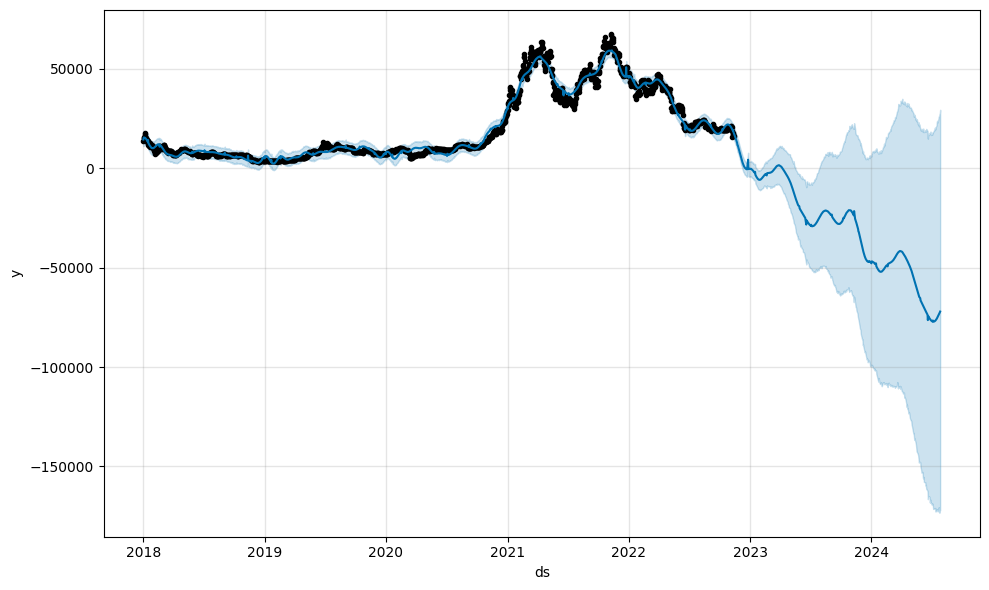

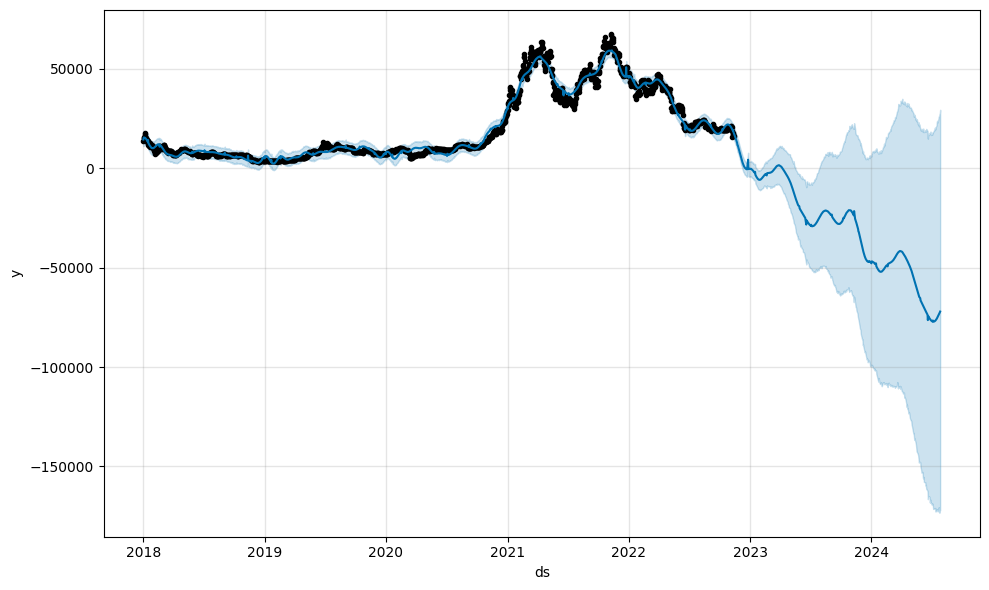

In [88]:
model_prophet.plot(btc_pred)

In [89]:
from prophet.plot import plot_plotly
import nbformat
plot_plotly(model_prophet,btc_pred)

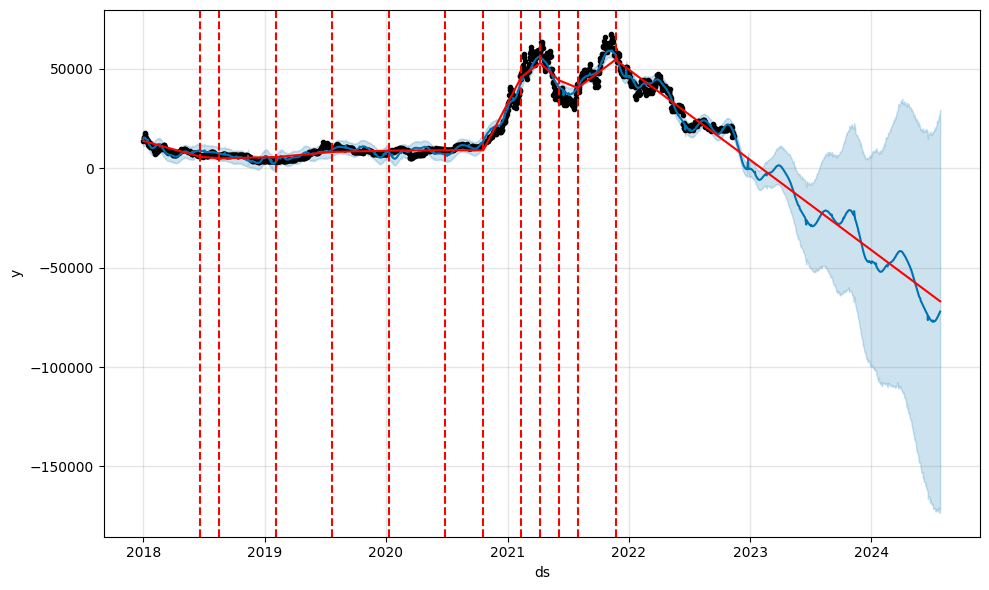

In [90]:
fig=model_prophet.plot(btc_pred)
a=add_changepoints_to_plot(fig.gca(),model_prophet,btc_pred)